In [2]:
import numpy as np
import ast
import matplotlib.pyplot as plt
from collections import OrderedDict
from google.colab import files
uploaded = files.upload()

Saving output_dec.py to output_dec.py
Saving output_nov.py to output_nov.py
Saving output_oct.py to output_oct.py


In [3]:
mainDir = "/content"

octFile = open((mainDir+"/output_oct.py"), "r")
octData = octFile.read()
octData = ast.literal_eval(octData)
octFile.close()

novFile = open((mainDir+"/output_nov.py"), "r")
novData = novFile.read()
novData = ast.literal_eval(novData)
novFile.close()

decFile = open((mainDir+"/output_dec.py"), "r")
decData = decFile.read()
decData = ast.literal_eval(decData)
decFile.close()




In [4]:
ttlList = []

def filterData(allData):
	ipDict = {}
	for ip in allData['']:
		ipDict[ip] = []
		for dns in allData[''][ip]:
			ttlList.append(float(dns[1]))
			ipDict[ip].append(dns[0])
	return ipDict

octFilteredData = filterData(octData)
novFilteredData = filterData(novData)
decFilteredData = filterData(decData)



In [5]:
monthIPCount = {}
monthIPCount['October'] = len(octFilteredData)
monthIPCount['November'] = len(novFilteredData)
monthIPCount['December'] = len(decFilteredData)



print(monthIPCount)

{'October': 765, 'November': 68, 'December': 920}


<BarContainer object of 3 artists>

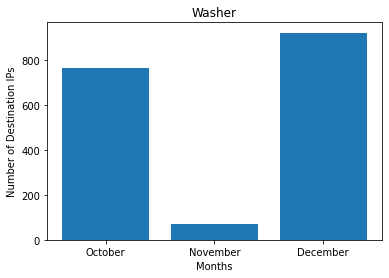

In [6]:
ipKeys = monthIPCount.keys()
ipValues = monthIPCount.values()
plt.title('Washer')
plt.xlabel('Months')
plt.ylabel('Number of Destination IPs')
plt.bar(ipKeys, ipValues)

In [8]:
pip install venn

  Created wheel for venn: filename=venn-0.1.3-py3-none-any.whl size=19714 sha256=2963a6180f5ac42d0df55f7fc8644e63aa6414834f2f178345f5abd71efe5392
  Stored in directory: /root/.cache/pip/wheels/85/8c/61/85a84e4c69c79c6475b9689755fc4ee4dae0bdc32b101011cb
Successfully built venn


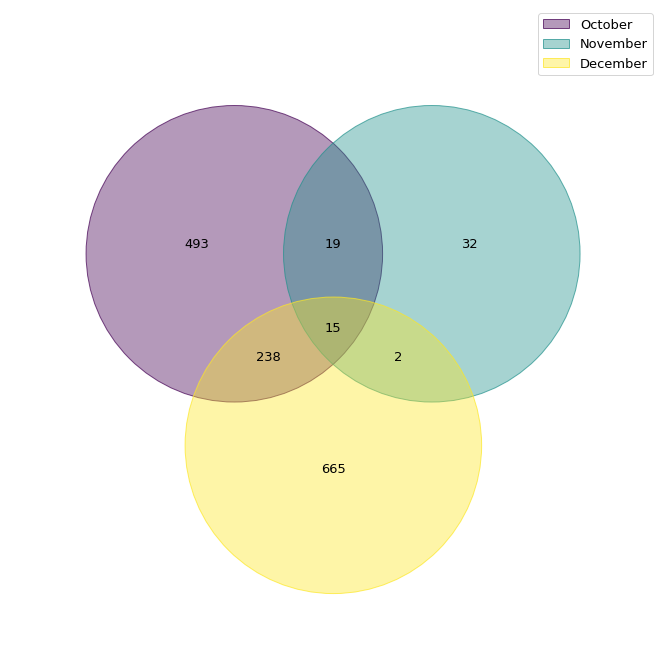

In [12]:
from venn import venn
labels = ['October', 'November', 'December', 'January', 'February', 'March', 'April', 'May','June','July','Aug','September']
sets = {
    labels[0]: set(octFilteredData.keys()),
    labels[1]: set(novFilteredData.keys()),
    labels[2]: set(decFilteredData.keys())
}

fig, ax = plt.subplots(1, figsize=(16,12))
venn(sets, ax=ax)

In [8]:
#February month seems to be abnormal
all_IP = list(octFilteredData.keys()) + list(novFilteredData.keys()) + list(decFilteredData.keys()) 
febExtraIP = []
for IP in decFilteredData:
  #print (IP)
  if IP not in all_IP:
    print(IP)
    febExtraIP.append(IP)

print('February Extra IPS', febExtraIP)
print(len(febExtraIP))



February Extra IPS []
0


In [9]:
octDomainDict = {}
for domainList in octFilteredData.values():
  for domain in domainList:
    if domain not in octDomainDict:
      octDomainDict[domain] = 1
    else:
      octDomainDict[domain] += 1
print('oct', octDomainDict)

novDomainDict = {}
for domainList in novFilteredData.values():
  for domain in domainList:
    if domain not in novDomainDict:
      novDomainDict[domain] = 1
    else:
      novDomainDict[domain] += 1
print('nov', novDomainDict)


decDomainDict = {}
for domainList in decFilteredData.values():
  for domain in domainList:
    if domain not in decDomainDict:
      decDomainDict[domain] = 1
    else:
      decDomainDict[domain] += 1
print('dec', decDomainDict)



oct {'ipv4.connman.net': 7, 'gld.push.samsungosp.com': 383, 'graph-custom.whisk.com': 140, 'graph.whisk.com': 1099, 'pool.ntp.org': 128, 'eu-odc.tizenstore.com': 9, 'ap-odc.tizenstore.com': 6214, 'www.samsungotn.net': 120, 'api.sesupdate.com': 70, 'api.weather.com': 1520, 'configprd.samsungcloudsolution.net': 34, 'info.cspserver.net': 228, 'fhstatic.cspserver.net': 40, 'samsung-image-cdn.whisk.com': 102, 'us-fhapi.cspserver.net': 1083, 'cdn.britannica.com': 284, 'oauth.ring.com': 3960, 'us-auth2.samsungosp.com': 4149, 'log.samsunghrm.com': 462, 'ocfconnect-shard-na03-useast2.samsungiotcloud.com': 1968, 'bixby-client.aibixby.com': 196, 'api.samsungcloud.com': 631, 'fhapi.cspserver.net': 20, 'esdk-ffl.spotify.com': 8, 'cas.samsungcloud.com': 736, 'uimetadata.samsungiotcloud.com': 607, 'provisioning-use2.mgmt.aibixby.com': 736, 'ash-use2.mgmt.aibixby.com': 408, 'cas.api.samsungcloud.com': 68, 'api.shopliftr.com': 180, 'lcprd1.samsungcloudsolution.net': 357, 'use.fontawesome.com': 4, 'dpm.

In [20]:
list_oct=list(octDomainDict.keys())
list_nov=list(novDomainDict.keys())
list_dec=list(decDomainDict.keys())

all_list=list_oct+list_nov+list_dec
oct_count=0
print(len(list_oct))
nov_count=0
for num in list_nov:
  if num not in list_oct:
    nov_count+=1
print(nov_count)

dec_count=0
for num in list_dec:
  if num not in list_oct+list_nov:
    dec_count+=1
print(dec_count)

count_common=0
for num in list_nov:
  if num in list_oct:
    count_common+=1
    print(num)

print("common: ",count_common)



print(len(list_oct),len(list_nov),len(list_dec))

54
15
11
www.googleapis.com
common:  1
54 16 43


In [ ]:
"""
After careful observation of these domain names we can observe a few things-
1. There are mainly 2 types of domain names-
  a. imp-xx-electricimp.com
  b. prdxxx.boxen.electricimp.com
  Exception in May2021- upgrades.electricimp.com (may be because Software is getting updated)

2. imp-xx.... domain name changes only after May (when there was upgrades domain name)

3. One of prdxxx format domain name is present for consecutive 2 months, so 1 such domain name is common in 2 months
"""

'\nAfter careful observation of these domain names we can observe a few things-\n1. There are mainly 2 types of domain names-\n  a. imp-xx-electricimp.com\n  b. prdxxx.boxen.electricimp.com\n  Exception in May2021- upgrades.electricimp.com (may be because Software is getting updated)\n\n2. imp-xx.... domain name changes only after May (when there was upgrades domain name)\n\n3. One of prdxxx format domain name is present for consecutive 2 months, so 1 such domain name is common in 2 months\n'

In [16]:
domainCount = {}
domainCount['October'] = sum(octDomainDict.values())
domainCount['November'] = sum(novDomainDict.values())
domainCount['December'] = sum(decDomainDict.values())

<BarContainer object of 3 artists>

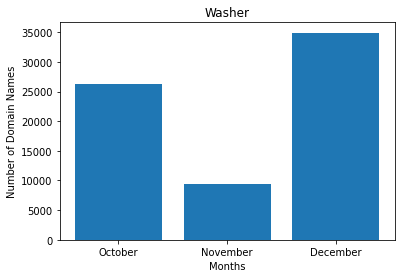

In [18]:
domainKeys = domainCount.keys()
domainValues = domainCount.values()
plt.title('Washer')
plt.xlabel('Months')
plt.ylabel('Number of Domain Names')

plt.bar(domainKeys, domainValues)

In [13]:
import pandas as pd
ttlDF = pd.DataFrame(ttlList)
print('TTL', ttlDF.describe())

TTL                   0
count  7.069100e+04
mean   1.606271e+09
std    2.268920e+06
min    1.602662e+09
25%    1.603699e+09
50%    1.607295e+09
75%    1.608105e+09
max    1.609496e+09
